In [259]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA       


In [202]:
train = pd.read_csv("/Users/seydanurkayir/Desktop/iyzico-datathon/train.csv")
train.head()

,merchant_id,month_id,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count
0,merchant_43992,202307,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,15106
1,merchant_43992,202301,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16918
2,merchant_43992,202305,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,13452
3,merchant_43992,202308,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,16787
4,merchant_43992,202302,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_197,Segment - 2,12428


In [ ]:
#train = pd.read_csv("/Users/seydanurkayir/Desktop/iyzico-datathon/train.csv", parse_dates=['month_id'], index_col='month_id',)


In [203]:
sub = pd.read_csv("/Users/seydanurkayir/Desktop/iyzico-datathon/sample_submission.csv")
sub.head(1)

,id,net_payment_count
0,202311merchant_36004,0


In [204]:
train["month_id"] = pd.to_datetime(train["month_id"], format="%Y%m")

train = train.sort_values(by='month_id')
train['month_id'] = train['month_id'].astype('datetime64[ns]')

train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291142 entries, 63650 to 291141
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   merchant_id           291142 non-null  object        
 1   month_id              291142 non-null  datetime64[ns]
 2   merchant_source_name  291142 non-null  object        
 3   settlement_period     291142 non-null  object        
 4   working_type          291142 non-null  object        
 5   mcc_id                291142 non-null  object        
 6   merchant_segment      291142 non-null  object        
 7   net_payment_count     291142 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 20.0+ MB


In [86]:
#train.index = pd.to_period(train.index, freq='M')

#train.index = pd.to_datetime(train.index)
#month_index = train.index.to_period('M')

#train.index.to_period("M")


In [205]:
train['month_id']=pd.to_datetime(train['month_id'])

train.set_index('month_id', inplace=True)

train.index

DatetimeIndex(['2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01', '2020-01-01', '2020-01-01',
               '2020-01-01', '2020-01-01',
               ...
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01', '2023-09-01', '2023-09-01',
               '2023-09-01', '2023-09-01'],
              dtype='datetime64[ns]', name='month_id', length=291142, freq=None)

In [6]:
#for i in train['merchant_id'].unique():
    #describe_ = train[train['merchant_id'] == i].describe()
    #print(f"Merchant ID: {i}")
    #print(describe_.to_string())
    #print("\n" + "="*50 + "\n")

In [206]:
train[["merchant","id"]] = train["merchant_id"].str.split("_", expand=True)


In [207]:
train.drop(['merchant_id','merchant'], axis=1, inplace=True)
train.head()

,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,id
month_id,,,,,,,
2020-01-01,Merchant Source - 1,Settlement Period - 1,Working Type - 6,mcc_130,Segment - 4,6,66740
2020-01-01,Merchant Source - 1,Settlement Period - 1,Working Type - 2,mcc_153,Segment - 4,3,12444
2020-01-01,Merchant Source - 2,Settlement Period - 1,Working Type - 5,mcc_168,Segment - 4,3,40154
2020-01-01,Merchant Source - 3,Settlement Period - 3,Working Type - 2,mcc_25,Segment - 2,787,33179
2020-01-01,Merchant Source - 2,Settlement Period - 1,Working Type - 6,mcc_31,Segment - 4,5,16977


In [208]:
result = train.sort_values(by=['id'])
result.head()

,merchant_source_name,settlement_period,working_type,mcc_id,merchant_segment,net_payment_count,id
month_id,,,,,,,
2022-10-01,Merchant Source - 2,Settlement Period - 1,Working Type - 5,mcc_128,Segment - 4,3,1
2021-08-01,Merchant Source - 2,Settlement Period - 1,Working Type - 5,mcc_128,Segment - 4,3,1
2022-03-01,Merchant Source - 2,Settlement Period - 3,Working Type - 6,mcc_42,Segment - 4,9,10
2021-11-01,Merchant Source - 2,Settlement Period - 3,Working Type - 6,mcc_42,Segment - 4,6,10
2022-04-01,Merchant Source - 2,Settlement Period - 3,Working Type - 6,mcc_42,Segment - 4,4,10


In [182]:
result = train.groupby('id')
result.describe()

net_payment_count                                                     
                  count       mean        std  min    25%   50%    75%   max
id                                                                          
1                   2.0   3.000000   0.000000  3.0   3.00   3.0   3.00   3.0
10                  6.0  10.833333   7.467708  4.0   6.25   8.0  13.50  24.0
10000              11.0   4.727273   2.004540  3.0   4.00   4.0   5.00  10.0
10001               9.0  26.333333  20.916501  6.0  13.00  19.0  36.00  74.0
10002               6.0   3.166667   0.408248  3.0   3.00   3.0   3.00   4.0
...                 ...        ...        ...  ...    ...   ...    ...   ...
9984               11.0   4.363636   1.206045  3.0   3.00   5.0   5.00   6.0
9985                1.0   4.000000        NaN  4.0   4.00   4.0   4.00   4.0
9986                6.0   3.666667   0.816497  3.0   3.00   3.5   4.00   5.0
9991               16.0  10.000000   5.988879  3.0   6.75   8.0  11.25  23.0
9993                6.0   4.000000   2.000000  3.0   3.00   3.0   3.75   8.0

[26060 rows x 8 columns]

In [277]:
#ts = result["net_payment_count","id"]
#ts.head()

ts = pd.DataFrame({"net_payment_count":result['net_payment_count'],
                  "id":result['id']
                  })
ts.head()



,net_payment_count,id
month_id,,
2022-10-01,3,1
2021-08-01,3,1
2022-03-01,9,10
2021-11-01,6,10
2022-04-01,4,10


<Axes: xlabel='month_id'>

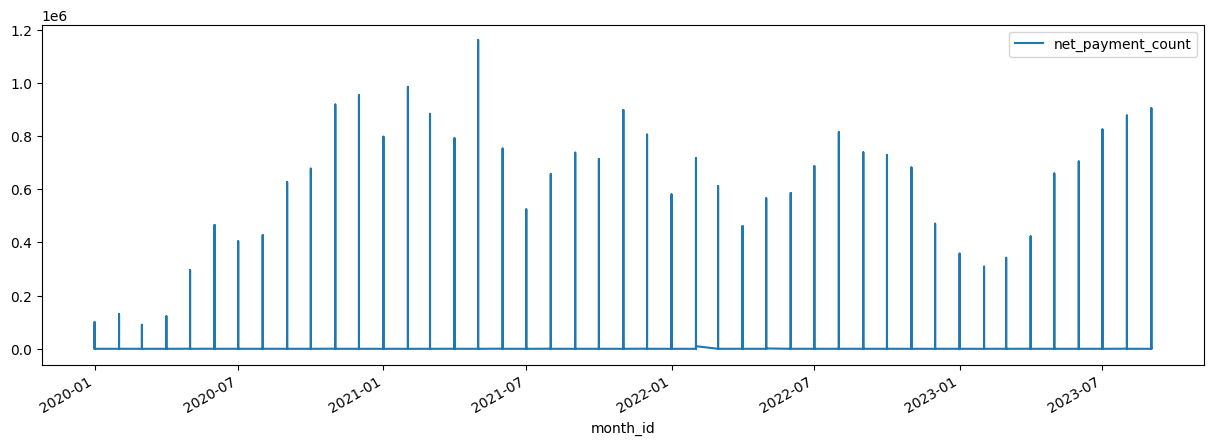

In [210]:
ts.plot(figsize=(15,5))


In [129]:
#ts.index = ts.index.to_period("M")


<Axes: xlabel='month_id', ylabel='net_payment_count'>

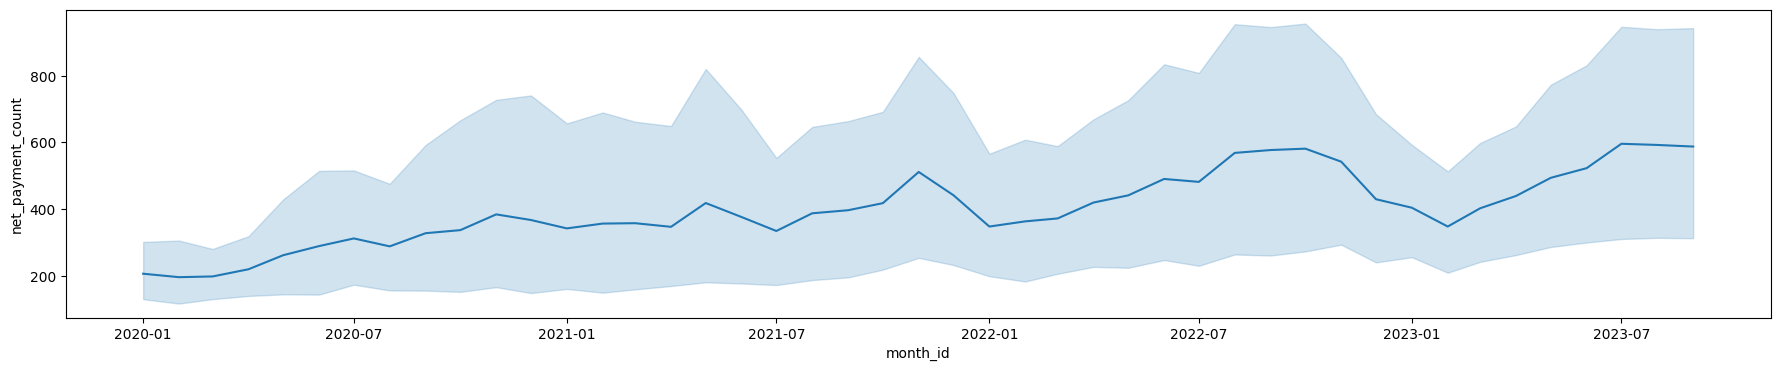

In [211]:
plt.figure(figsize=(22,4))
sns.lineplot(data = ts.reset_index(), x="month_id", y="net_payment_count")

In [274]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ts)


ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [ ]:
fig, axes = plt.subplots(4, 1, sharex=True)

result.observed.plot(ax = axes[0], color='r')
axes[0].set_ylabel('Gözlemlenen')

result.trend.plot(ax = axes[1], color='g')
axes[1].set_ylabel('Trend')

result.seasonal.plot(ax = axes[2])
axes[2].set_ylabel('Sezonsallık')

result.resid.plot(ax = axes[3], color='k')
axes[3].set_ylabel('Artıklar');

In [264]:
plt.rcParams['figure.figsize'] = [20,7]
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

In [255]:
decompose_result = seasonal_decompose(ts['net_payment_count'], model='multiplicative', period=1)
decompose_result.plot();

NameError: name 'seasonal_decompose' is not defined

In [212]:
ts.index

DatetimeIndex(['2022-10-01', '2021-08-01', '2022-03-01', '2021-11-01',
               '2022-04-01', '2022-02-01', '2021-12-01', '2022-01-01',
               '2022-06-01', '2023-03-01',
               ...
               '2023-02-01', '2023-08-01', '2022-11-01', '2023-06-01',
               '2023-01-01', '2023-06-01', '2022-12-01', '2023-02-01',
               '2022-10-01', '2022-11-01'],
              dtype='datetime64[ns]', name='month_id', length=291142, freq=None)

In [228]:
ts

,net_payment_count,id
month_id,,
2022-10-01,3,1
2021-08-01,3,1
2022-03-01,9,10
2021-11-01,6,10
2022-04-01,4,10
...,...,...
2023-06-01,4,9993
2022-12-01,3,9993
2023-02-01,3,9993


In [214]:
ts.isnull().sum()

net_payment_count    0
id                   0
dtype: int64

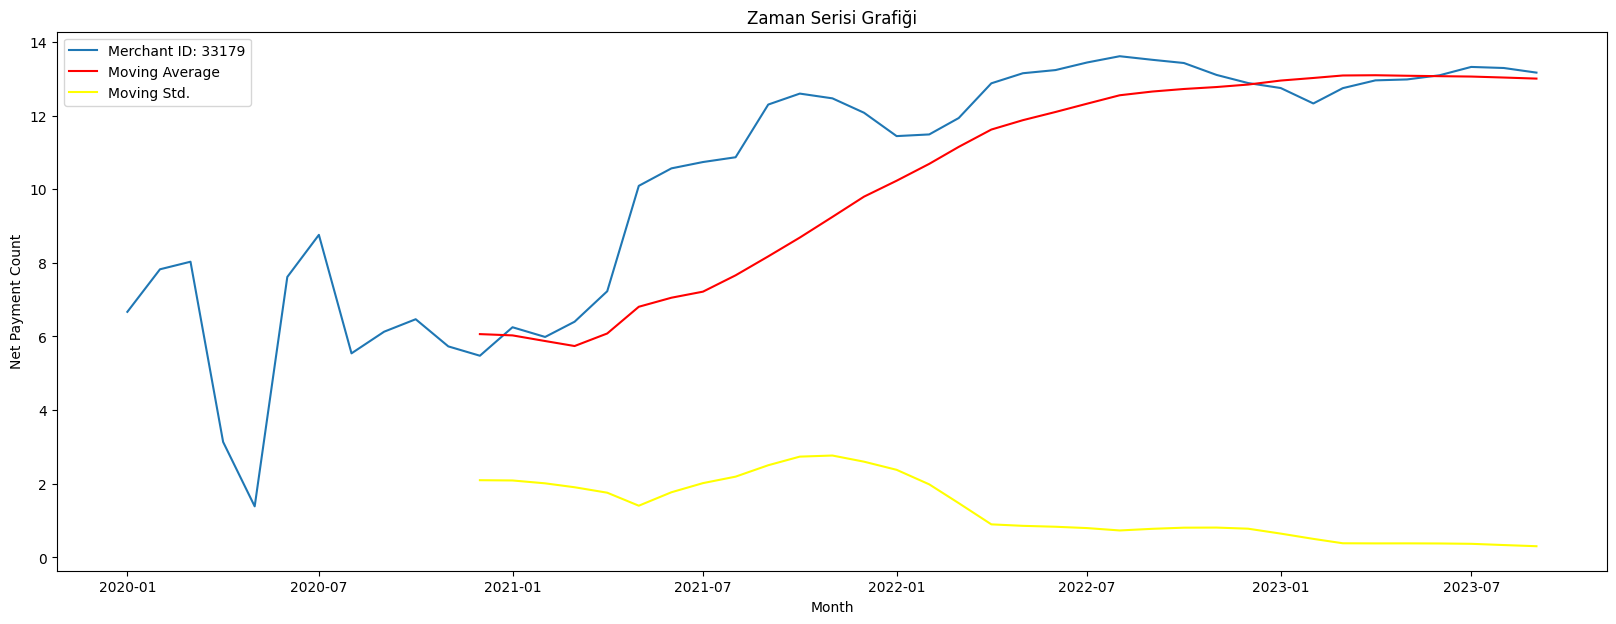

In [229]:
def plot_merchant(ts, id):
    data = ts[ts['id'] == id]
    merchant_data = data.sort_values(by=['month_id'])

    
    ts_log = np.log(merchant_data['net_payment_count'])
    moving_avg = ts_log.rolling(12).mean()
    moving_std = ts_log.rolling(12).std()
    #plt.plot(ts, color='red')
    plt.plot(ts_log, label=f'Merchant ID: {id}')
    plt.plot(moving_avg, color='red', label='Moving Average')
    plt.plot(moving_std, color='yellow', label='Moving Std.')

    plt.legend()
    plt.xlabel('Month')
    plt.ylabel('Net Payment Count')
    plt.title('Zaman Serisi Grafiği')

    plt.show()


plot_merchant(ts,'33179')

In [216]:
merchant_data = ts[ts['id'] == '33179']
merchant_data


,net_payment_count,id
month_id,,
2023-07-01,608646,33179
2023-06-01,485558,33179
2021-04-01,1377,33179
2023-02-01,225655,33179
2020-02-01,2499,33179
2021-12-01,175473,33179
2020-01-01,787,33179
2020-06-01,2030,33179
2022-06-01,558958,33179


In [230]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

merchant_data = ts[ts['id'] == '33179']

data = merchant_data['net_payment_count']
seasonal = True

model = pm.auto_arima(data, 
                      m=12,               # frequency of series                      
                      seasonal=seasonal,  # TRUE if seasonal series
                      d=None,             # let model determine 'd'
                      test='adf',         # use adftest to find optimal 'd'
                      start_p=0, start_q=0, # minimum p and q
                      max_p=3, max_q=3,   # maximum p and q
                      D=None,             # let model determine 'D'
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

# print model summary
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1257.380, Time=0.48 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1255.136, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1249.738, Time=0.08 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1233.400, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1253.184, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1231.933, Time=0.02 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1233.045, Time=0.06 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=1233.959, Time=0.13 sec
 ARIMA(0,1,2)(0,0,0)[12] intercept   : AIC=1236.198, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=1248.102, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[12] intercept   : AIC=1234.853, Time=0.27 sec
 ARIMA(0,1,1)(0,0,0)[12]             : AIC=1227.227, Time=0.09 sec
 ARIMA(0,1,1)(1,0,0)[12]             : AIC=1228.777, Time=0.07 sec
 ARIMA(0,1,1)(0,0,1)[12]

In [243]:
prediction, confint = model.predict(n_periods=TEST_SIZE, return_conf_int=True)

prediction

array([233459.9934855, 233459.9934855, 233459.9934855, 233459.9934855,
       233459.9934855, 233459.9934855, 233459.9934855, 233459.9934855,
       233459.9934855, 233459.9934855])

In [244]:
cf= pd.DataFrame(confint)


In [241]:
TEST_SIZE = 10
train, test = ts[ts['id'] == '33179'].iloc[:-TEST_SIZE], ts[ts['id'] == '33179'].iloc[-TEST_SIZE:]
x_train, x_test = np.array(range(train.shape[0])), np.array(range(train.shape[0], ts[ts['id'] == '33179'].shape[0]))
train.shape, x_train.shape, test.shape, x_test.shape


((35, 2), (35,), (10, 2), (10,))

In [249]:
pred_df = x_test.copy()


<Axes: xlabel='month_id', ylabel='net_payment_count'>

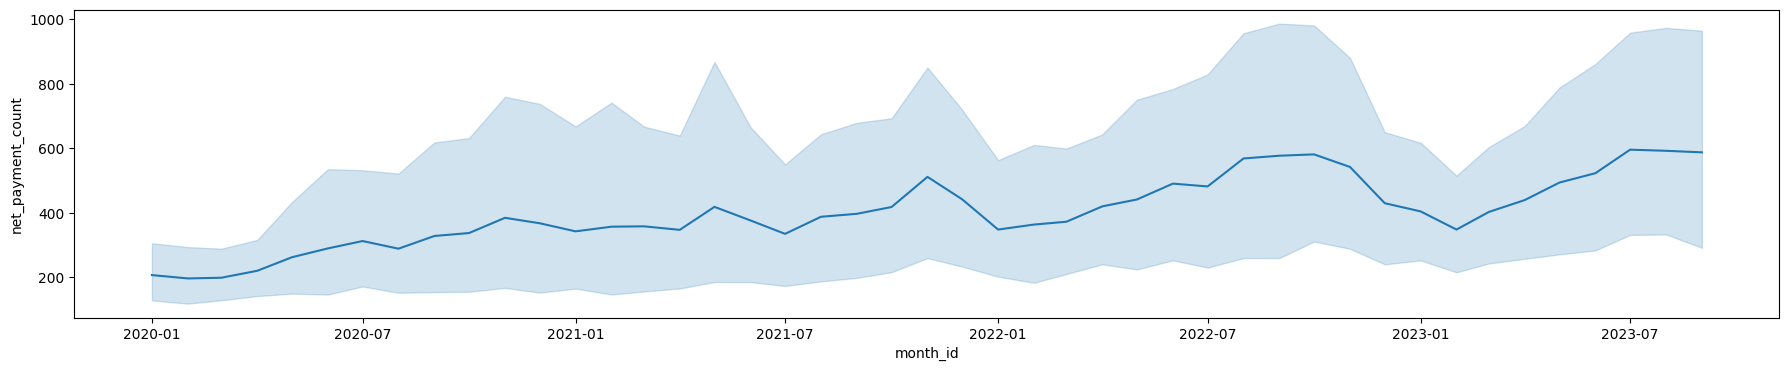

In [252]:
plt.figure(figsize=(22,4))
sns.lineplot(data = ts.reset_index(), x="month_id", y="net_payment_count")

ConversionError: Failed to convert value(s) to axis units: array(['33179', '33179', '33179', '33179', '33179', '33179', '33179',
       '33179', '33179', '33179', '33179', '33179', '33179', '33179',
       '33179', '33179', '33179', '33179', '33179', '33179', '33179',
       '33179', '33179', '33179', '33179', '33179', '33179', '33179',
       '33179', '33179', '33179', '33179', '33179', '33179', '33179'],
      dtype=object)

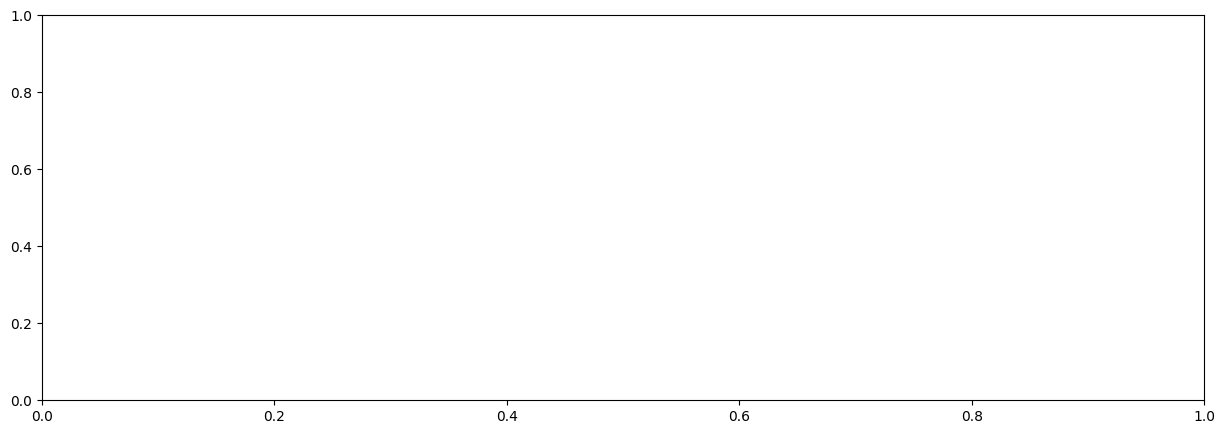

In [242]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(x_train, train)
ax.plot(x_test, test)

In [42]:
ts

,net_payment_count,id
month_id,,
2022-10-01,3,1
2021-08-01,3,1
2022-03-01,9,10
2021-11-01,6,10
2022-04-01,4,10
...,...,...
2023-06-01,4,9993
2022-12-01,3,9993
2023-02-01,3,9993


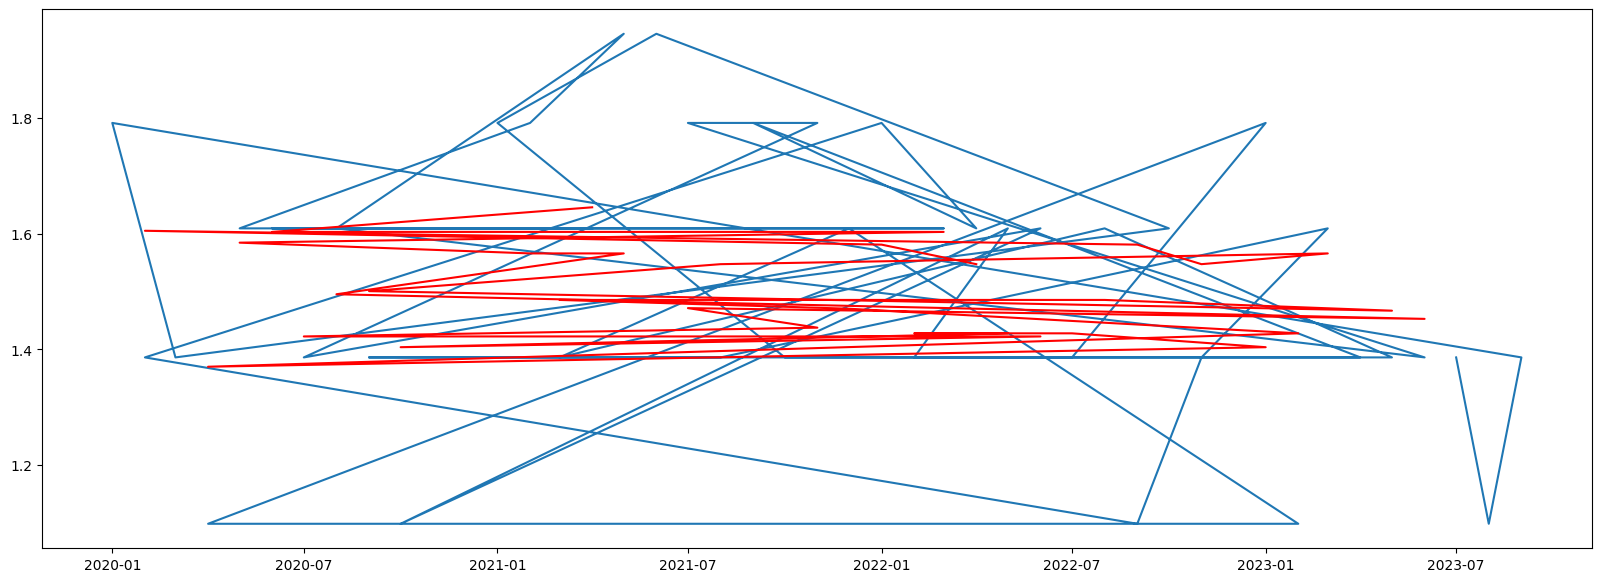

In [43]:
ts_log = np.log(ts.loc[ts['id'] == '66740', 'net_payment_count'])
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

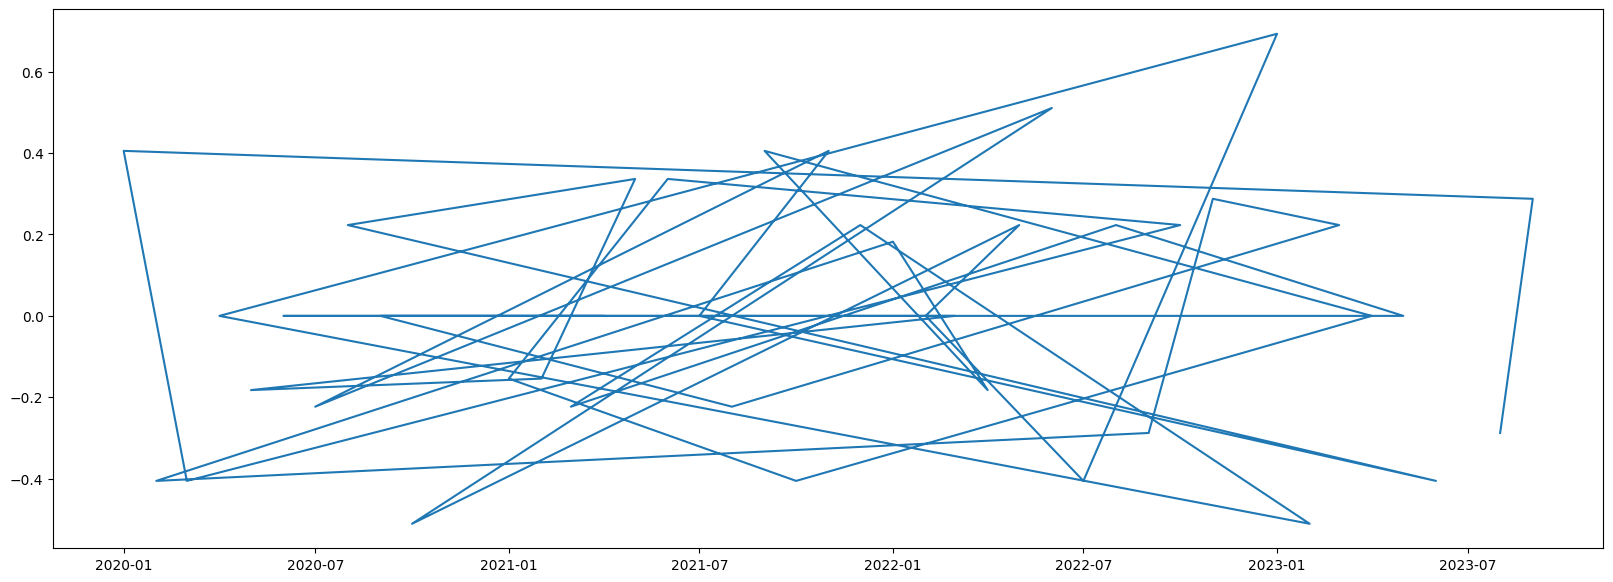

In [44]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
ts_log_diff.dropna(inplace=True)

/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/seydanurkayir/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored w

Text(0.5, 1.0, 'RSS: nan')

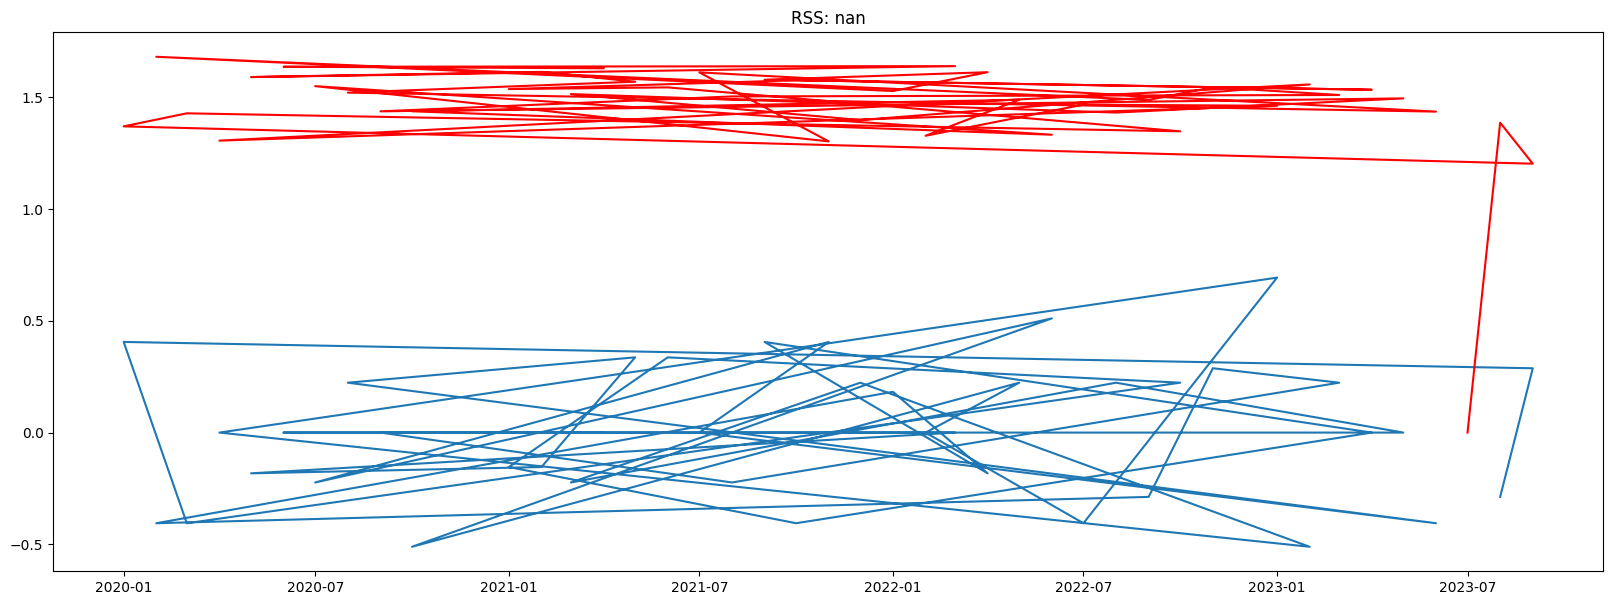

In [35]:

model = sm.tsa.arima.ARIMA(ts_log, order=(2, 1, 2))  
results_ARIMA = model.fit()  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

In [36]:
y_pred = model.get_forecast(len(ts.index))
y_pred_df = y_pred.conf_int(alpha = 0.05) 
y_pred_df["Predictions"] = model.predict(start = y_pred_df.index[0], end = y_pred_df.index[-1])
y_pred_df.index = ts.index
y_pred_out = y_pred_df["Predictions"] 
plt.plot(y_pred_out, color='Yellow', label = 'ARIMA Predictions')
plt.legend()

AttributeError: 'ARIMA' object has no attribute 'get_forecast'

In [73]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)


predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

In [66]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.dropna(inplace=True)
plot_merchant(ts_log_moving_avg_diff,'66740')

KeyError: 'id'

In [39]:
print(ts.info())


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 291142 entries, 2022-10-01 to 2022-11-01
Data columns (total 2 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   net_payment_count  291142 non-null  int64
 1   id                 291142 non-null  int64
dtypes: int64(2)
memory usage: 6.7 MB
None


/var/folders/cb/8__b21_56gd5ffsbpj2m5c6m0000gn/T/ipykernel_868/3700301516.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ts["net_payment_count"], color = 'y')


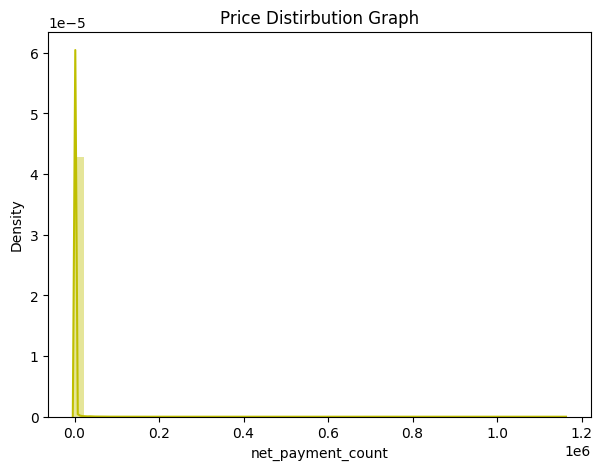

In [257]:
plt.figure(figsize=(7,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(ts["net_payment_count"], color = 'y')

Text(0.5, 1.0, 'Time Series')

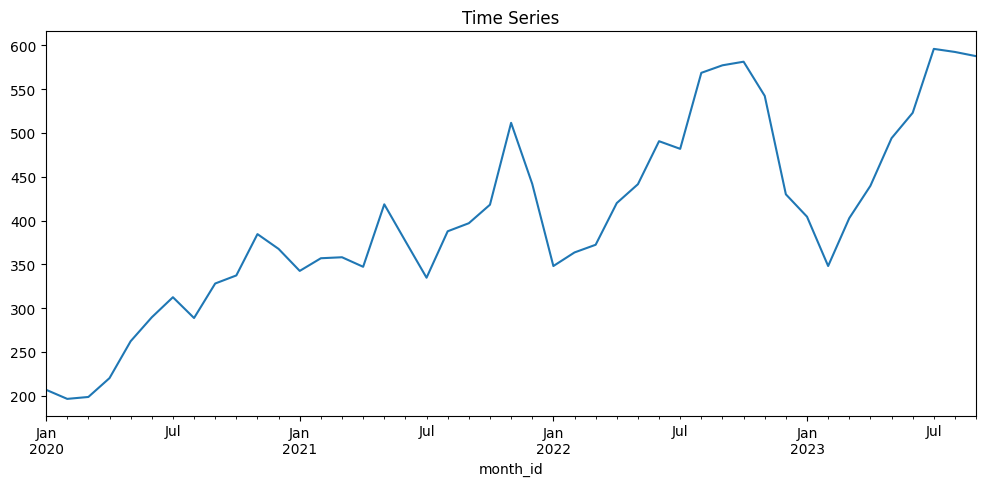

In [258]:
dategroup=ts.groupby(ts.index).mean()
plt.figure(figsize=(12,5))
dategroup['net_payment_count'].plot(x=ts.index)
plt.title('Time Series')

In [42]:
ts[:'2020-02']

,net_payment_count,id
month_id,,
2020-01-01,3,10005
2020-02-01,4,10005
2020-02-01,5,10034
2020-01-01,5,10034
2020-01-01,5,10052
...,...,...
2020-02-01,15,9938
2020-01-01,16,9938
2020-01-01,3,9942
